In [ ]:
import os
import glob
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import tensorflow as tf
from PIL import Image as im
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import cv2
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage.feature import local_binary_pattern

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from google.colab.patches import cv2_imshow

In [ ]:
quickdraw_dataset_path = "/content/drive/MyDrive/Quick_Draw"

In [ ]:
classes = ["airplane", "ambulance", "angel", "ant", "anvil", "apple", "arm", "asparagus", "axe", "backpack", "banana", "bandage", "barn", "baseball", "basket", "basketball", "bat", "bathtub", "beach", "bear", "beard", "bed", "bee", "belt", "bench", "bicycle", "binoculars", "bird", "birthday cake", "blackberry", "blueberry", "book", "boomerang", "bottlecap", "bowtie", "bracelet", "brain", "bread", "bridge", "broccoli", "broom", "bucket", "bulldozer", "bus", "bush", "butterfly", "cactus", "cake", "calculator", "calendar", "camel", "camera", "camouflage", "campfire", "candle", "cannon", "canoe", "car", "carrot", "castle", "cat", "cello", "chair", "chandelier", "church", "circle", "clarinet", "clock", "cloud", "coffee cup", "compass", "computer", "cookie", "cooler", "couch", "cow", "crab", "crayon", "crocodile", "crown", "cup", "diamond", "dishwasher", "dog", "dolphin", "donut", "door", "dragon", "dresser", "drill", "drums", "duck", "dumbbell", "ear", "elbow", "elephant", "envelope", "eraser", "eye", "eyeglasses", "face", "fan", "feather", "fence", "finger", "fireplace", "firetruck", "fish", "flamingo", "flashlight", "flower", "foot", "fork", "frog", "garden", "giraffe", "goatee", "grapes", "grass", "guitar", "hamburger", "hammer", "hand", "harp", "hat", "headphones", "hedgehog", "helicopter", "helmet", "hexagon", "hockey stick", "horse", "hospital", "hourglass", "house", "hurricane", "jacket", "jail", "kangaroo", "key", "keyboard", "knee", "knife", "ladder", "lantern", "laptop", "leaf", "leg", "lighter", "lighthouse", "lightning", "line", "lion", "lipstick", "lobster", "lollipop", "mailbox", "map", "marker", "matches", "megaphone", "mermaid", "microphone", "microwave", "monkey", "moon", "mosquito", "motorbike", "mountain", "mouse", "moustache", "mouth", "mug", "mushroom", "nail", "necklace", "nose", "ocean", "octagon", "octopus", "onion", "oven", "owl", "paintbrush", "paint can", "palm tree", "panda", "pants", "parachute", "parrot", "passport", "peanut", "pear", "peas", "pencil", "penguin", "piano", "pig", "pillow", "pineapple", "pizza", "pliers", "pond", "pool", "popsicle", "postcard", "potato", "purse", "rabbit", "raccoon", "radio", "rain", "rainbow", "rake", "rhinoceros", "rifle", "river", "rollerskates", "sailboat", "sandwich", "saw", "saxophone", "school bus", "scissors", "scorpion", "screwdriver", "sea turtle", "shark", "sheep", "shoe", "shorts", "shovel", "sink", "skateboard", "skull", "skyscraper", "smiley face", "snail", "snake", "snorkel", "snowflake", "snowman", "sock", "speedboat", "spider", "spoon", "spreadsheet", "square", "squiggle", "squirrel", "stairs", "star", "steak", "stereo", "stethoscope", "stitches", "stove", "strawberry", "streetlight", "string bean", "submarine", "suitcase", "sun", "swan", "sweater", "swing set", "sword", "syringe", "table", "teapot", "teddy-bear", "telephone", "television", "tennis racquet", "tent", "The Eiffel Tower", "The Great Wall of China", "The Mona Lisa", "tiger", "toaster", "toe", "toilet", "tooth", "toothbrush", "toothpaste", "tornado", "tractor", "traffic light", "train", "tree", "triangle", "trombone", "truck", "trumpet", "t-shirt", "umbrella", "underwear", "van", "vase", "violin", "washing machine", "watermelon", "waterslide", "whale", "wheel", "windmill", "wine bottle", "wine glass", "wristwatch", "yoga", "zebra", "zigzag"]

url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'

for class_ in classes[:100]:
	if(" " in class_):
		continue
	complete_url = url+class_+".npy"
	print("Downloading : ",complete_url)
	urllib.request.urlretrieve(complete_url, quickdraw_dataset_path +"/"+class_+".npy")

In [ ]:
data_sets = glob.glob(os.path.join('/content/drive/MyDrive/Quick_Draw/*.npy'))
print(len(data_sets))
data_sets = data_sets[:20]

98


In [ ]:
def denoise_image(image):

    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.medianBlur(image, 3)

    if len(image.shape) == 3:
        denoised = cv2.cvtColor(denoised, cv2.COLOR_GRAY2BGR)

    return denoised

In [ ]:
dataset_path = '/content/drive/MyDrive/'
data_sets = glob.glob(os.path.join('/content/drive/MyDrive/Quick_Draw/*.npy'))
data_sets = data_sets[:20]
print(data_sets)
input = np.empty([0, 784])

labels = np.empty([0])
index = 0

for file in data_sets:
	data = np.load(file)
	data = data[0: 6000, :]
	input = np.concatenate((input, data), axis=0)
	labels = np.append(labels, [index]*data.shape[0])
	index += 1

n_fold = 5
kf = KFold(n_splits=n_fold, shuffle=True, random_state=9)
x_train, x_test, y_train, y_test = None, None, None, None
random_ordering = np.random.permutation(input.shape[0])
input = input[random_ordering, :]
labels = labels[random_ordering]

for train_index, test_index in kf.split(input):
    x_train, x_test = input[train_index], input[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    break

print(len(x_train))

print(len(x_test))

['/content/drive/MyDrive/Quick_Draw/airplane.npy', '/content/drive/MyDrive/Quick_Draw/ambulance.npy', '/content/drive/MyDrive/Quick_Draw/angel.npy', '/content/drive/MyDrive/Quick_Draw/ant.npy', '/content/drive/MyDrive/Quick_Draw/anvil.npy', '/content/drive/MyDrive/Quick_Draw/apple.npy', '/content/drive/MyDrive/Quick_Draw/arm.npy', '/content/drive/MyDrive/Quick_Draw/asparagus.npy', '/content/drive/MyDrive/Quick_Draw/axe.npy', '/content/drive/MyDrive/Quick_Draw/backpack.npy', '/content/drive/MyDrive/Quick_Draw/banana.npy', '/content/drive/MyDrive/Quick_Draw/bandage.npy', '/content/drive/MyDrive/Quick_Draw/barn.npy', '/content/drive/MyDrive/Quick_Draw/baseball.npy', '/content/drive/MyDrive/Quick_Draw/basket.npy', '/content/drive/MyDrive/Quick_Draw/basketball.npy', '/content/drive/MyDrive/Quick_Draw/bat.npy', '/content/drive/MyDrive/Quick_Draw/bathtub.npy', '/content/drive/MyDrive/Quick_Draw/beach.npy', '/content/drive/MyDrive/Quick_Draw/bear.npy']
96000
24000


In [ ]:
print(x_train.shape)

(96000, 784)


In [ ]:
image_size = 28
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size, image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size, image_size)


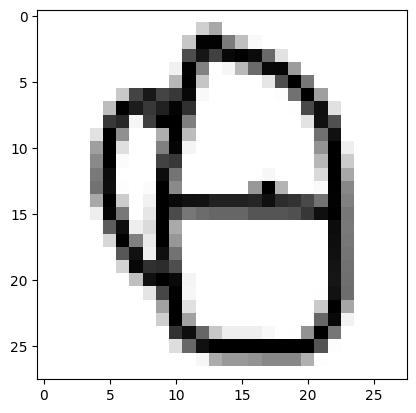

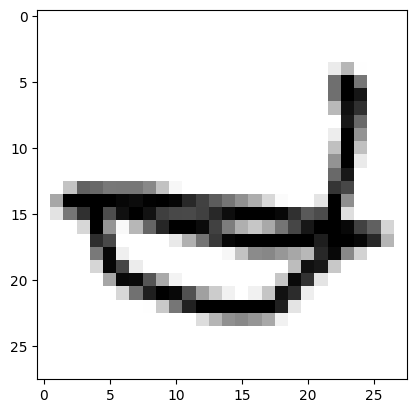

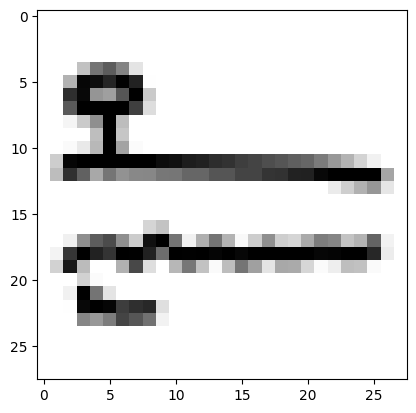

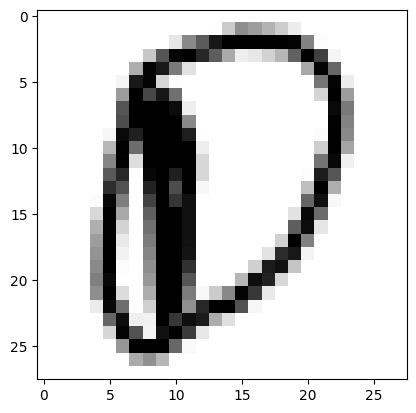

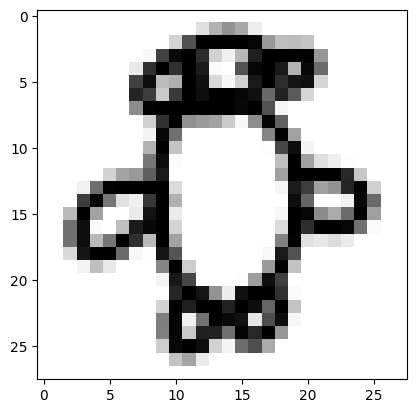

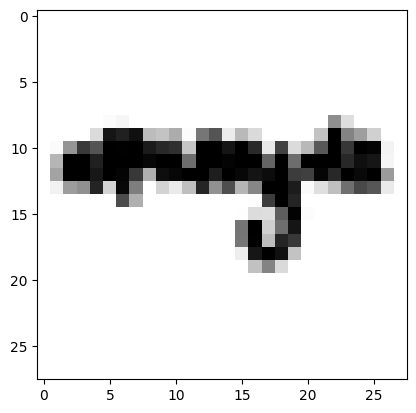

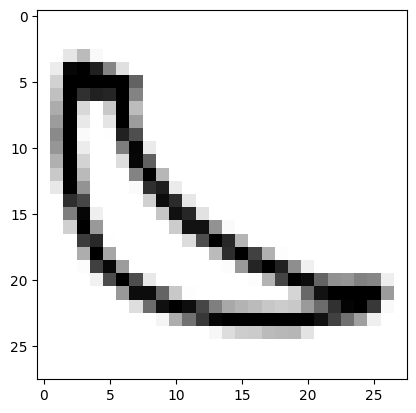

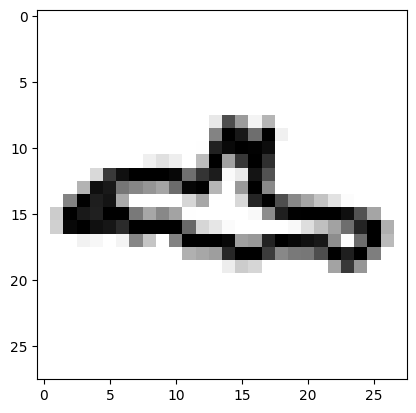

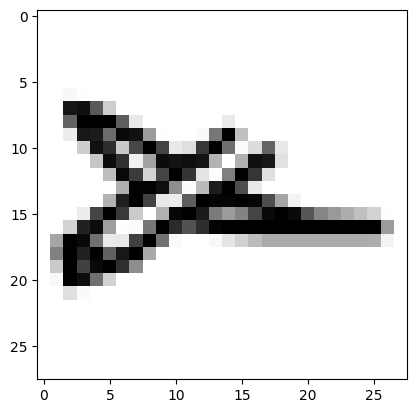

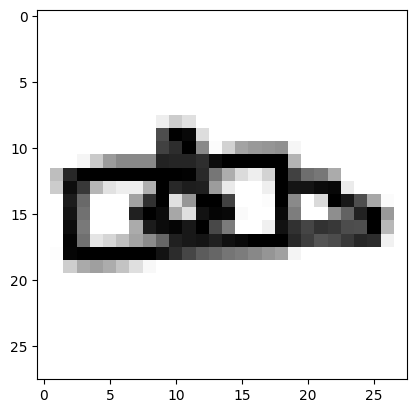

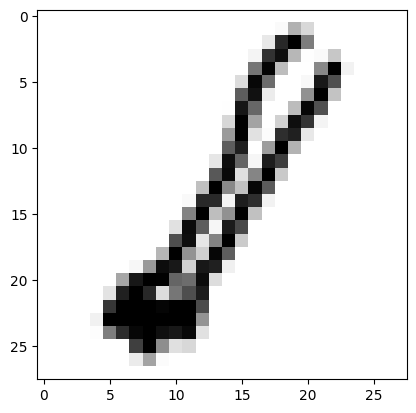

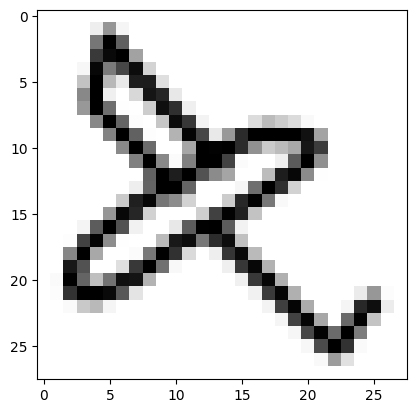

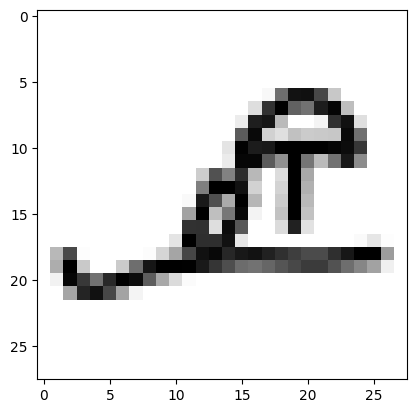

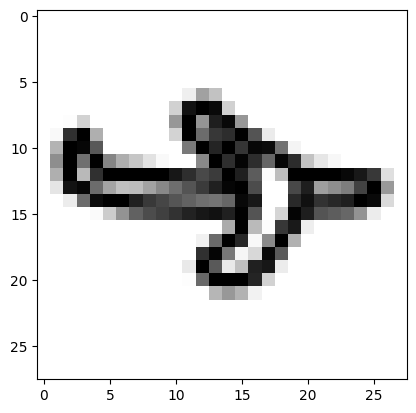

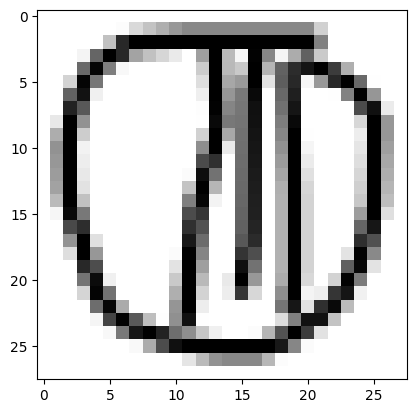

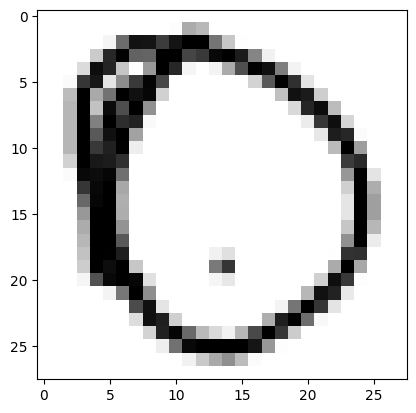

In [ ]:
for i in range(16):
  plt.grid(False)
  plt.imshow(x_train_reshaped[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
print(x_train_reshaped[0].shape)

(28, 28)


In [ ]:
len(x_train_reshaped[34])

28

In [ ]:
denoised_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  denoised_x_train.append(x)


denoised_x_train=np.array(denoised_x_train)
denoised_x_train=denoised_x_train.reshape(-1,784)

In [ ]:
denoised_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  denoised_x_test.append(x)


denoised_x_test=np.array(denoised_x_test)
denoised_x_test=denoised_x_test.reshape(-1,784)

In [ ]:
def enhance_contrast(image):
    equalized = cv2.equalizeHist(image)

    return equalized

In [ ]:
contrast_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=enhance_contrast(x)
  contrast_x_train.append(x)
contrast_x_train=np.array(contrast_x_train)
contrast_x_train=contrast_x_train.reshape(-1,784)

In [ ]:
contrast_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  contrast_x_test.append(x)


contrast_x_test=np.array(contrast_x_test)
contrast_x_test=contrast_x_test.reshape(-1,784)

In [ ]:
def apply_filter(image, filter_type, kernel_size):

    if filter_type == 'gaussian':
        kernel = cv2.getGaussianKernel(kernel_size, 0)
        kernel = np.outer(kernel, kernel.transpose())
    elif filter_type == 'sobel_x':
        kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
    elif filter_type == 'sobel_y':
        kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])
    elif filter_type == 'laplacian':
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
    else:
        raise ValueError('Invalid filter type')

    filtered = cv2.filter2D(image, -1, kernel)

    return filtered

In [ ]:
filter_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_filter(x,'gaussian', 3)
  filter_x_train.append(x)
filter_x_train=np.array(filter_x_train)
filter_x_train=filter_x_train.reshape(-1,784)

In [ ]:
filter_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  filter_x_test.append(x)


filter_x_test=np.array(filter_x_test)
filter_x_test=filter_x_test.reshape(-1,784)

In [ ]:
def apply_clahe(image, clip_limit=2.0, tile_size=(8, 8)):

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    enhanced = clahe.apply(image)

    return enhanced

In [ ]:
clahe_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_clahe(x)
  clahe_x_train.append(x)
clahe_x_train=np.array(clahe_x_train)
clahe_x_train=clahe_x_train.reshape(-1,784)

In [ ]:
clahe_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  clahe_x_test.append(x)


clahe_x_test=np.array(clahe_x_test)
clahe_x_test=clahe_x_test.reshape(-1,784)

In [ ]:
def smooth_and_sharpen(image):
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_8U, ksize=3)

    sharpened = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)

    return sharpened

In [ ]:
sharp_x_train=[]
for img in x_train_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=apply_clahe(x)
  sharp_x_train.append(x)
sharp_x_train=np.array(sharp_x_train)
sharp_x_train=sharp_x_train.reshape(-1,784)

In [ ]:
sharp_x_test=[]
for img in x_test_reshaped:
  cv2.imwrite('color_img.jpg', img)
  x=cv2.imread("color_img.jpg", cv2.IMREAD_GRAYSCALE)
  x=denoise_image(x)
  sharp_x_test.append(x)


sharp_x_test=np.array(sharp_x_test)
sharp_x_test=sharp_x_test.reshape(-1,784)

In [ ]:
features ={}

In [ ]:
def horizontal_projection(im):
  img = 255 - im
  proj = np.sum(img,1)
  m = np.max(proj)
  w = 28
  result = np.zeros((proj.shape[0],28))
  for row in range(img.shape[0]):
   cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)
  return result

In [ ]:
features["Horizontal Projection"]=horizontal_projection(x_train_reshaped[0])

In [ ]:
hp_x_train=[]
for img in x_train_reshaped:
  x=horizontal_projection(img)
  hp_x_train.append(x)
hp_x_train=np.array(hp_x_train)
hp_x_train=hp_x_train.reshape(-1,784)

In [ ]:
def detect_shapes(img):
    # Check if the image is uint8
    if img.dtype != np.uint8:
      # Convert the image to uint8
      img = img.astype(np.uint8)

    # Apply the Canny edge detector
    edges = cv2.Canny(img, 100, 200)
    img = cv2.resize(img, (28, 28))

    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    edges = cv2.Canny(img, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    features = []

    for contour in contours:

        area = cv2.contourArea(contour)
        if area < 5:
            continue


        perimeter = cv2.arcLength(contour, True)

        circularity = 4 * 3.14 * (area / (perimeter * perimeter))
        features.append(circularity)

    return features

In [ ]:
features["Shape Detection"]=detect_shapes(x_train_reshaped[0])

In [ ]:
import cv2
import numpy as np

def extract_corners(image):
    # Check and convert the image to the correct type if necessary
    if image.dtype != np.uint8 and image.dtype != np.float32:
        gray = image.astype(np.float32)  # Convert to float32 if not already an 8-bit or 32-bit float image
    else:
        gray = image

    max_corners = 100
    quality_level = 0.3
    min_distance = 7
    block_size = 7

    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance, blockSize=block_size)
    if corners is not None:
        corners = np.int0(corners)
        for i in corners:
            x, y = i.ravel()
            cv2.circle(gray, (x, y), 3, 255, -1)

    return gray

# Use the function with your image
features["Corner Detection"] = extract_corners(x_train_reshaped[0])



<ipython-input-52-ec16fc07ddfe>:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [ ]:
import cv2
import numpy as np

def detect_edges(image):
    # Ensure the image is in 8-bit unsigned format
    if image.dtype != np.uint8:
        gray = np.uint8(image * 255)  # Normalize and convert if needed
    else:
        gray = image

    # Apply Gaussian blur to the grayscale image
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Detect edges using the Canny algorithm
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    return edges

# Use the function with your grayscale image
features["Edge Detection"] = detect_edges(x_train_reshaped[0])


In [ ]:
def create_lbp(image):

    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray=image

    radius = 1
    num_neighbors = 8
    lbp = np.zeros_like(gray)
    for i in range(radius, gray.shape[0]-radius):
        for j in range(radius, gray.shape[1]-radius):
            center = gray[i,j]
            code = 0
            for k in range(num_neighbors):
                angle = k * (2*np.pi/num_neighbors)
                x = int(np.round(i + radius * np.cos(angle)))
                y = int(np.round(j - radius * np.sin(angle)))
                neighbor = gray[x,y]
                if neighbor > center:
                    code += 2**k
            lbp[i,j] = code
    lbp = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return lbp

features["LBP"]=create_lbp(x_train_reshaped[0])

In [ ]:
##Data Augmentation


In [ ]:
def rotate_image(image, angle):
    # Get the dimensions of the input image
    height, width = image.shape[:2]

    # Calculate the rotation matrix using the specified angle
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

    # Apply the rotation matrix to the input image using cv2.warpAffine()
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image
rotated_x_train=[]
for img in x_train_reshaped:
  x=rotate_image(img,5)
  rotated_x_train.append(x)
rotated_x_train=np.array(rotated_x_train)
rotated_x_train=rotated_x_train.reshape(-1,784)

In [ ]:
def horizontal_flip(image):
    # Flip the input image horizontally using cv2.flip()
    flipped_image = cv2.flip(image, 1)

    return flipped_image
flip_x_train=[]
for img in x_train_reshaped:
  x=horizontal_flip(img)
  flip_x_train.append(x)
flip_x_train=np.array(flip_x_train)
flip_x_train=flip_x_train.reshape(-1,784)

In [ ]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from PIL import Image
import networkx as nx
from skimage import io
def vec(img):
  labels1 = segmentation.slic(img, compactness=5, n_segments=50000,
                          start_label=1)
  out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
  out1 = Image.fromarray(out1, 'RGB')
  return out1

vec_x_train=[]
i=0
for img in x_train_reshaped[:100]:
  # if(i%1000==0):
  #   print(i)
  # i=i+1
  x=vec(img)
  vec_x_train.append(x)
vec_x_train=np.array(vec_x_train)


Classification

KNN

In [ ]:
dic={}
dic1={}
dic2={}
enchanced={}
dic_hp={}

In [ ]:
def KNN(x_train_1d, y_train, x_test_1d,y_test):

  tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

  knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
  knn.fit(x_train_1d, y_train)


  y_pred = knn.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['KNN']=KNN(x_train,y_train,x_test,y_test)

0.6817083333333334


In [ ]:
dic1['KNN']=KNN(flip_x_train,y_train,x_test,y_test)

0.664625


In [ ]:
dic2['KNN']=KNN(rotated_x_train,y_train,x_test,y_test)

0.7024166666666667


In [ ]:
#Logistic Regression
def LogisticReg(x_train_1d, y_train, x_test_1d,y_test):
  clf = LogisticRegression(random_state=0)
  # knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
  clf.fit(x_train_1d, y_train)

  y_pred = clf.predict(x_test_1d)
  y_pred[:10]
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

dic['Logistic Regression']=LogisticReg(x_train,y_train,x_test,y_test)

0.5202083333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dic1['Logistic Regression']=LogisticReg(flip_x_train,y_train,x_test,y_test)

0.4942916666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dic2['Logistic Regression']=LogisticReg(rotated_x_train,y_train,x_test,y_test)

0.4900833333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Naive Bayes
def NaiveBayes(x_train_1d, y_train, x_test_1d,y_test):
  clf = GaussianNB()
  # knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
  clf.fit(x_train_1d, y_train)

  y_pred = clf.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy
dic['Naive Bayes']=NaiveBayes(x_train,y_train,x_test,y_test)


0.3559583333333333


In [ ]:
dic1['Naive Bayes']=NaiveBayes(flip_x_train,y_train,x_test,y_test)

0.3405


In [ ]:
dic2['Naive Bayes']=NaiveBayes(rotated_x_train,y_train,x_test,y_test)

0.3459583333333333


In [ ]:
#Random Forest
def RandomForest(x_train_1d, y_train, x_test_1d,y_test):

  parameters = {'n_estimators': [100,120,140,160]}

  clf_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, random_state=0)
  # model = GridSearchCV(clf_rf, parameters, n_jobs=-1)
  clf_rf.fit(x_train_1d, y_train)



  y_pred = clf_rf.predict(x_test_1d)
  y_pred[:10]

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  return accuracy

In [ ]:
dic['Random Forest']=RandomForest(x_train,y_train,x_test,y_test)

0.7079583333333334


In [ ]:
dic1['Random Forest']=RandomForest(flip_x_train,y_train,x_test,y_test)

0.688875


In [ ]:
dic2['Random Forest']=RandomForest(rotated_x_train,y_train,x_test,y_test)

0.6602916666666667


In [ ]:
enchanced['Denoised']=RandomForest(denoised_x_train,y_train,denoised_x_test,y_test)

0.7165


In [ ]:
enchanced['Contrast']=RandomForest(contrast_x_train,y_train,contrast_x_test,y_test)

0.5198333333333334


In [ ]:
enchanced['Filter']=RandomForest(filter_x_train,y_train,filter_x_test,y_test)

0.6254166666666666


In [ ]:
enchanced['clahe']=RandomForest(clahe_x_train,y_train,clahe_x_test,y_test)

0.57875


In [ ]:
enchanced['sharp']=RandomForest(sharp_x_train,y_train,sharp_x_test,y_test)

0.57875


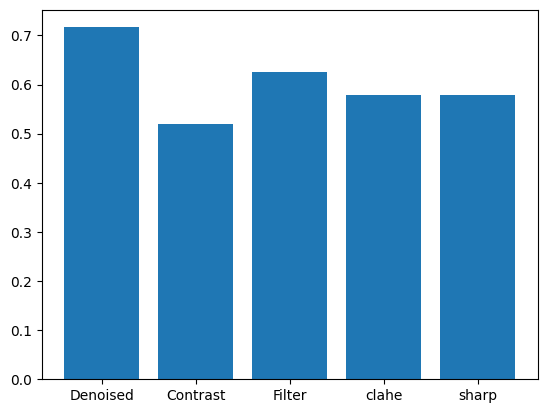

In [ ]:
plt.bar(range(len(enchanced)), list(enchanced.values()), align='center')
plt.xticks(range(len(enchanced)), list(enchanced.keys()))
plt.show()

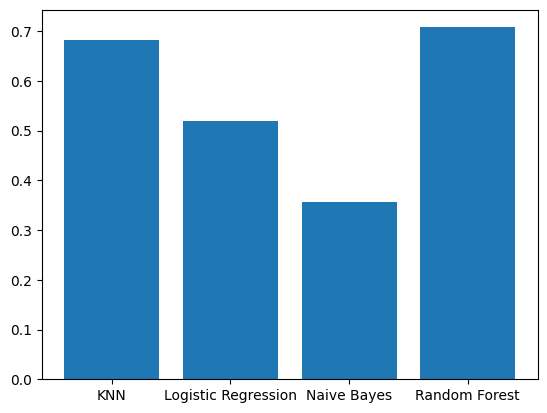

In [ ]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

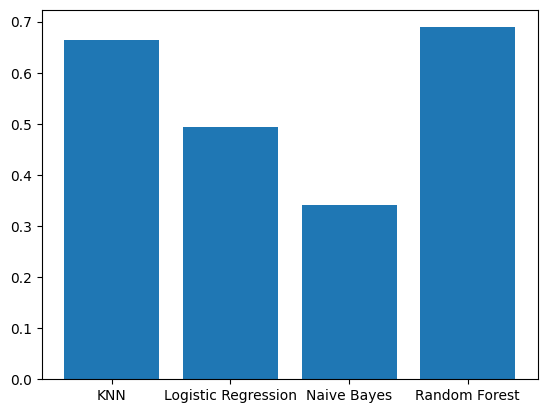

In [ ]:
plt.bar(range(len(dic1)), list(dic1.values()), align='center')
plt.xticks(range(len(dic1)), list(dic1.keys()))
plt.show()

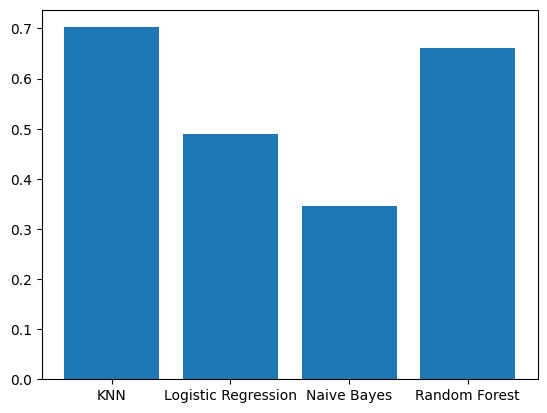

In [ ]:
plt.bar(range(len(dic2)), list(dic2.values()), align='center')
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.show()

In [ ]:
dicf={}
dicv={}

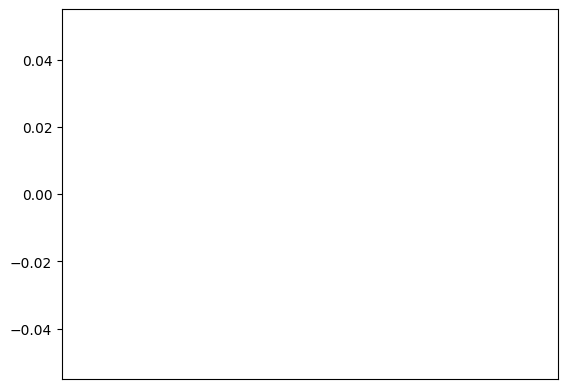

In [ ]:
plt.bar(range(len(features)), list(features.values()), align='center')
plt.xticks(range(len(features)), list(features.keys()))
plt.show()

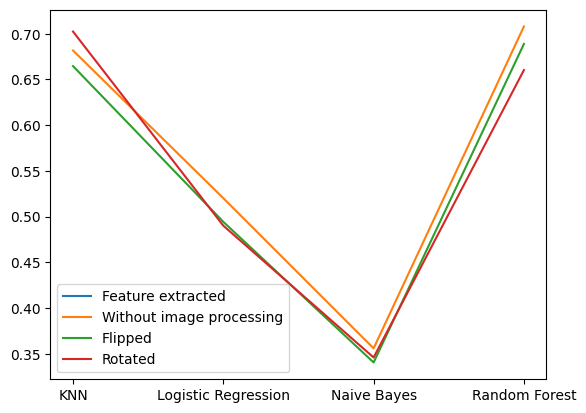

In [ ]:
plt.plot(range(len(dicf)), list(dicf.values()))
plt.plot(range(len(dic)), list(dic.values()))
plt.plot(range(len(dic1)), list(dic1.values()))
plt.plot(range(len(dic2)), list(dic2.values()))
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.legend(["Feature extracted", "Without image processing","Flipped","Rotated"])
plt.show()

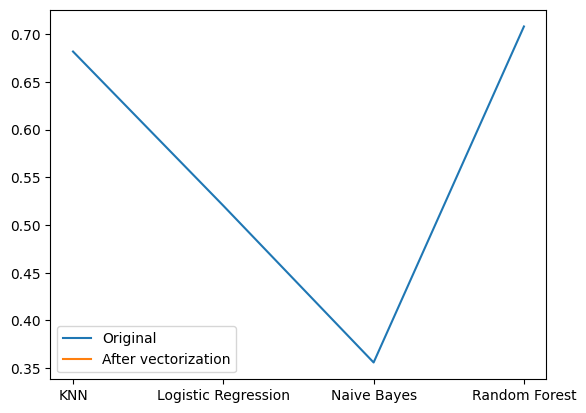

In [ ]:
plt.plot(range(len(dic)), list(dic.values()))
plt.plot(range(len(dicv)), list(dicv.values()))
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.legend(["Original","After vectorization"])
plt.show()

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=d2bbd03905d373a37e617f7608319a6cda55ad29bd2c58f252bab366be9fb2ec
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server
anvil.server.connect("server_AUOSXS2C7WZHVBN2EYGNCP4G-EWCEHDZDUEIAGFYC")
def predict(ing):
  return ans
anvil.server.wait_forever()


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


KeyboardInterrupt: 